<a href="https://colab.research.google.com/github/heasun0111/Machine-learning/blob/master/sin%ED%95%A8%EC%88%98%20%EC%98%88%EC%B8%A1_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:     1 loss = 0.6904585
Epoch:     1 loss = 1.2226635
Epoch:     1 loss = 0.7102807
Epoch:     1 loss = 0.1090302
Epoch:     1 loss = 0.0576969
Epoch:     1 loss = 0.3511852
Epoch:     1 loss = 0.1686040
Epoch:     1 loss = 0.1970273
Epoch:     1 loss = 0.0734666
Epoch:     1 loss = 0.0084680
Epoch:     2 loss = 0.1653246
Epoch:     2 loss = 0.0121363
Epoch:     2 loss = 0.0011696
Epoch:     2 loss = 0.1336814
Epoch:     2 loss = 0.1240027
Epoch:     2 loss = 0.0374007
Epoch:     2 loss = 0.0029511
Epoch:     2 loss = 0.0394265
Epoch:     2 loss = 0.0685624
Epoch:     2 loss = 0.0127471
Epoch:     3 loss = 0.0010983
Epoch:     3 loss = 0.0038693
Epoch:     3 loss = 0.0009620
Epoch:     3 loss = 0.0027388
Epoch:     3 loss = 0.0002739
Epoch:     3 loss = 0.0003246
Epoch:     3 loss = 0.0020171
Epoch:     3 loss = 0.0018439
Epoch:     3 loss = 0.0058031
Epoch:     3 loss = 0.0020770
Epoch:     4 loss = 0.0003397
Epoch:     4 loss = 0.0003289
Epoch:     4 loss = 0.0003287
Epoch:    

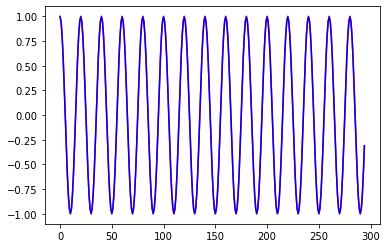

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import torch
from torch.autograd import Variable


def sin_data(x, T=100):
    return np.sin(2.0 * np.pi * x / T)


def toy_problem(T=100, amp=0.05):
    x = np.arange(0, 15 * T + 1)
    return sin_data(x, T)


T = 100

f = toy_problem(T)

data = []
target = []

for i in range(0, 15 * T - 25):
    data.append(f[i:i + 25])
    target.append(f[i + 25])

data = torch.Tensor(data)
target = torch.Tensor(target)

batch_size = 5
hidden_size = 20

dataset = TensorDataset(data, target)
loader = DataLoader(dataset, batch_size=batch_size)


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(hidden_size, 1)
        self.rnn = nn.RNN(input_size=1, hidden_size=hidden_size, batch_first=True, nonlinearity='relu')

    def forward(self, x):
        h0 = Variable(torch.zeros(1, batch_size, hidden_size))
        x, hn = self.rnn(x, h0)
        x = self.fc(x[:, -1, :])

        return x


model = Net()
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0003)

for epoch in range(200):
    optimizer.zero_grad()

    for batch_idx, (data, target) in enumerate(loader):

        output = model(data.view(batch_size, 25, 1))
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 30 == 0:
            print('Epoch:', '%5d' % (epoch + 1), 'loss =', '{:.7f}'.format(loss))

rlt = []
tar = []

with torch.no_grad():
    model.eval()

    for batch_idx, (data, target) in enumerate(loader):
        out = model(data.view(batch_size, 25, 1)).numpy()
        rlt.append(out)
        tar.append(target[0])

    pt = [i for i in range(len(rlt))]
    plt.plot(pt, tar, "r")
    plt.plot(pt, [r[0][0] for r in rlt], "b")
    plt.show()
